In [3]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy


In [4]:
testing_sites_df =  pd.read_csv('https://raw.githubusercontent.com/dcrago/Team50_Project/main/COVID-19%20Testing%20Locations%20Symbolized%20by%20Test%20Type.csv?token=AP7Z5UVL5AEH4YLZOKSZXFS73OAGM')

In [5]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [6]:
testing_sites_df.head()

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8979782.297,4874576.993
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7904519.958,5248669.198
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8905649.968,4931349.163
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8240722.529,5056547.051
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8912678.464,4958745.420


In [7]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv")

In [8]:
Covid_data

,date,county,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2020-12-17,Autauga,Alabama,1001.0,3510,43.0,3113.0,38.0,397.0,5.0
1,2020-12-17,Baldwin,Alabama,1003.0,11212,145.0,8682.0,109.0,2530.0,36.0
2,2020-12-17,Barbour,Alabama,1005.0,1296,30.0,814.0,26.0,482.0,4.0
3,2020-12-17,Bibb,Alabama,1007.0,1520,42.0,1327.0,25.0,193.0,17.0
4,2020-12-17,Blount,Alabama,1009.0,3950,50.0,2947.0,48.0,1003.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3241,2020-12-17,Sweetwater,Wyoming,56037.0,2574,15.0,2446.0,NaN,128.0,NaN
3242,2020-12-17,Teton,Wyoming,56039.0,1958,2.0,1903.0,NaN,55.0,NaN
3243,2020-12-17,Uinta,Wyoming,56041.0,1363,7.0,1128.0,NaN,235.0,NaN
3244,2020-12-17,Washakie,Wyoming,56043.0,661,11.0,516.0,NaN,145.0,NaN


In [9]:
Covid_data.describe()

,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
count,3218.000000,3246.000000,3168.000000,2400.000000,1943.000000,1828.000000,1201.000000
mean,31471.421069,5242.743685,97.109217,4976.090833,116.070510,535.498359,17.679434
std,16368.839603,18916.495225,540.524535,18120.955745,584.914655,2329.746724,146.871127
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19035.500000,562.500000,8.000000,495.750000,8.000000,40.000000,0.000000
50%,30026.000000,1351.000000,22.000000,1241.500000,24.000000,137.500000,2.000000
75%,46118.500000,3533.500000,58.000000,3386.750000,64.000000,401.250000,8.000000
max,78030.000000,566185.000000,24578.000000,566005.000000,19844.000000,70095.000000,4734.000000


In [12]:
with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
    AQI = pd.read_csv(AQI)
AQI.head()


,Date,Country,City,Specie,count,min,max,median,variance
0,2/27/2020,UZ,Tashkent,pm25,24,34.0,147.0,53.0,10221.70
1,3/12/2020,UZ,Tashkent,pm25,24,152.0,201.0,160.0,1304.93
2,8/2/2020,UZ,Tashkent,pm25,24,38.0,119.0,63.0,4586.67
3,8/23/2020,UZ,Tashkent,pm25,24,55.0,159.0,74.0,10854.50
4,10/4/2020,UZ,Tashkent,pm25,24,70.0,157.0,85.0,5356.94


In [13]:
AQI.columns

Index(['Date', 'Country', 'City', 'Specie', 'count', 'min', 'max', 'median',
       'variance'],
      dtype='object')

In [14]:
AQI_US = AQI.loc[AQI['Country'] == 'US']
AQI_US

,Date,Country,City,Specie,count,min,max,median,variance
508048,11/19/2020,US,Oklahoma City,so2,3,1.5,1.5,1.5,0.00
508049,11/26/2020,US,Oklahoma City,so2,3,1.5,1.5,1.5,0.00
508050,1/26/2020,US,Oklahoma City,so2,6,1.5,2.9,1.5,5.88
508051,2/26/2020,US,Oklahoma City,so2,2,1.5,1.5,1.5,0.00
508052,5/17/2020,US,Oklahoma City,so2,3,1.5,1.5,1.5,0.00
...,...,...,...,...,...,...,...,...,...
693444,9/27/2020,US,Fort Worth,wd,22,145.0,345.0,167.0,15960.40
693445,10/18/2020,US,Fort Worth,wd,22,132.0,343.0,180.0,35425.30
693446,10/22/2020,US,Fort Worth,wd,22,162.0,203.0,181.0,1041.41
693447,10/25/2020,US,Fort Worth,wd,21,59.0,150.0,121.0,11861.60


In [15]:
pd.unique(AQI_US['Specie'])

array(['so2', 'wind gust', 'wind-gust', 'temperature', 'wind-speed',
       'pm10', 'pm25', 'no2', 'o3', 'pressure', 'dew', 'co', 'humidity',
       'wind speed', 'wd', 'precipitation'], dtype=object)

In [16]:
#lists of countries and cities
print('countries', pd.unique(AQI['Country']))
print('cities', pd.unique(AQI['City']))

countries ['UZ' 'BE' 'BH' 'GB' 'KR' 'TM' 'AU' 'HK' 'NP' 'SG' 'DE' 'RO' 'UG' 'CA'
 'KW' 'PE' 'GT' 'IN' 'PR' 'BG' 'CY' 'DZ' 'EE' 'GE' 'US' 'XK' 'MY' 'PT'
 'SV' 'VN' 'FR' 'PK' 'SA' 'AR' 'BO' 'CN']
cities ['Tashkent' 'Liège' 'Brussels' 'Charleroi' 'Gent' 'Namur' 'Antwerpen'
 'Manama' 'Edinburgh' 'Norwich' 'Liverpool' 'Belfast' 'Coventry' 'Leeds'
 'Cardiff' 'Bristol' 'London' 'Birmingham' 'Sheffield' 'Newport'
 'Leicester' 'Manchester' 'Reading' 'Plymouth' 'Glasgow' 'Preston'
 'Swansea' 'Luton' 'Southend-on-Sea' 'Jeonju' 'Seoul' 'Busan' 'Sejong'
 'Ulsan' 'Yeosu' 'Gwangju' 'Seongnam-si' 'Daejeon' 'Pohang' 'Changwon'
 'Suwon' 'Cheongju-si' 'Chuncheon' 'Daegu' 'Jeju City' 'Incheon'
 'Suncheon' 'Mokpo' 'Andong' 'Ashgabat' 'Sydney' 'Newcastle' 'Launceston'
 'Hobart' 'Darwin' 'Melbourne' 'Canberra' 'Adelaide' 'Brisbane' 'Perth'
 'Wollongong' 'Hong Kong' 'Kathmandu' 'Pokhara' 'Biratnagar' 'Singapore'
 'Stuttgart' 'Münster' 'Köln' 'Kassel' 'Karlsruhe' 'Mainz' 'Dresden'
 'Munich' 'Berlin' 'Düsseldor

In [19]:
histAQI = pd.read_excel('airqualitytrendsbycity1990-2019.xlsx')
histAQI.head()

,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,NaN,NaN,NaN,...,8.700,7.100,7.500,7.300,6.20,6.200,5.40,5.800,6.600,5.900
1,10100,NaN,PM2.5,98th Percentile,1.0,NaN,NaN,NaN,NaN,NaN,...,27.000,18.000,23.000,22.000,17.00,14.000,14.00,13.000,22.000,18.000
2,10420,"Akron, OH",CO,2nd Max,1.0,5.70,3.300,4.100,3.100,5.300,...,1.400,1.000,1.100,0.800,0.80,1.000,1.10,0.900,1.800,1.800
3,10420,NaN,O3,4th Max,2.0,0.09,0.101,0.087,0.093,0.086,...,0.074,0.073,0.072,0.059,0.06,0.065,0.06,0.066,0.068,0.062
4,10420,NaN,PM2.5,Weighted Annual Mean,3.0,NaN,NaN,NaN,NaN,NaN,...,12.400,11.100,10.000,9.700,9.90,10.400,8.20,7.900,7.900,8.200


In [58]:
histAQI_Year_column = pd.melt(histAQI, id_vars=(['Pollutant','StateAbbr','Trend Statistic']), value_vars=([1990,
                                1991,                          1992,
                                1993,                          1994,
                                1995,                          1996,
                                1997,                          1998,
                                1999,                          2000,
                                2001,                          2002,
                                2003,                          2004,
                                2005,                          2006,
                                2007,                          2008,
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                          2016,
                                2017,                          2018,
                                2019]), var_name='Year', value_name='Pollutant Value').dropna()
histAQI_Year_column.head()

,Pollutant,StateAbbr,Trend Statistic,Year,Pollutant Value
2,CO,OH,2nd Max,1990,5.700
3,O3,nan,4th Max,1990,0.090
6,SO2,nan,99th Percentile,1990,161.000
9,O3,NY,4th Max,1990,0.086
12,CO,NM,2nd Max,1990,5.100


In [20]:
cities = histAQI['Core Based Statistical Area']
y = [str(i).split() for i in cities]

states = []
for i in y:
    state = i[-1]
    states.append(state)
histAQI['StateAbbr'] = states

In [57]:
histAQI.head()

,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,1992,1993,1994,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,StateAbbr
0,10100,"Aberdeen, SD",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,NaN,NaN,NaN,...,7.100,7.500,7.300,6.20,6.200,5.40,5.800,6.600,5.900,SD
1,10100,NaN,PM2.5,98th Percentile,1.0,NaN,NaN,NaN,NaN,NaN,...,18.000,23.000,22.000,17.00,14.000,14.00,13.000,22.000,18.000,nan
2,10420,"Akron, OH",CO,2nd Max,1.0,5.70,3.300,4.100,3.100,5.300,...,1.000,1.100,0.800,0.80,1.000,1.10,0.900,1.800,1.800,OH
3,10420,NaN,O3,4th Max,2.0,0.09,0.101,0.087,0.093,0.086,...,0.073,0.072,0.059,0.06,0.065,0.06,0.066,0.068,0.062,nan
4,10420,NaN,PM2.5,Weighted Annual Mean,3.0,NaN,NaN,NaN,NaN,NaN,...,11.100,10.000,9.700,9.90,10.400,8.20,7.900,7.900,8.200,nan


In [34]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')
asthma.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215010302,Current asthma among adults aged >=18 Years,%,...,8.8,NaN,NaN,6293,"(32.5420961469, -84.975715442)",HLTHOUT,CASTHMA,1319000.0,1.321501e+10,Current Asthma
1,2017,GA,Georgia,Johns Creek,City,BRFSS,Health Outcomes,1342425,Current asthma among adults aged >=18 Years,%,...,7.3,NaN,NaN,76728,"(34.0332991998, -84.2027195506)",HLTHOUT,CASTHMA,1342425.0,NaN,Current Asthma
2,2017,GA,Georgia,Sandy Springs,Census Tract,BRFSS,Health Outcomes,1368516-13121010119,Current asthma among adults aged >=18 Years,%,...,10.3,NaN,NaN,4938,"(33.9913040108, -84.3452326148)",HLTHOUT,CASTHMA,1368516.0,1.312101e+10,Current Asthma
3,2017,GA,Georgia,Roswell,Census Tract,BRFSS,Health Outcomes,1367284-13121011423,Current asthma among adults aged >=18 Years,%,...,7.9,NaN,NaN,4852,"(34.0177367078, -84.3840157981)",HLTHOUT,CASTHMA,1367284.0,1.312101e+10,Current Asthma
4,2017,GA,Georgia,Savannah,Census Tract,BRFSS,Health Outcomes,1369000-13051002300,Current asthma among adults aged >=18 Years,%,...,12.8,NaN,NaN,2056,"(32.0577200508, -81.1112836355)",HLTHOUT,CASTHMA,1369000.0,1.305100e+10,Current Asthma


In [35]:
asthma.drop(columns = ['Category','UniqueID','Measure','Short_Question_Text','Data_Value_Footnote','CategoryID','MeasureId','CityFIPS','TractFIPS'], inplace = True)
asthma.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type',
       'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'PopulationCount', 'GeoLocation'],
      dtype='object')

In [76]:
#putting years in 1 column before merge
asthma_premerge = asthma[['StateAbbr','Year','Data_Value']]
asthma_premerge

,StateAbbr,Year,Data_Value
0,GA,2017,8.4
1,GA,2017,7.2
2,GA,2017,9.7
3,GA,2017,7.4
4,GA,2017,11.9
...,...,...,...
29001,WY,2017,8.7
29002,WY,2017,10.9
29003,WI,2017,8.9
29004,WI,2017,10.0


In [82]:
#append adds rows
# histAQI_asthma = histAQI_Year_column.append(asthma_premerge)

#merge combines
histAQI_asthma = pd.merge(asthma_premerge,histAQI,
    how="left",                      
    left_on = ['StateAbbr'],
    right_on = ['StateAbbr'])                        
histAQI_asthma
pd.unique(histAQI_asthma['Year'])

array([2017])

In [83]:
histAQI_asthma= histAQI_asthma[histAQI_asthma.StateAbbr != 'US']

In [84]:
histAQI_asthma

,StateAbbr,Year,Data_Value,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trend Sites,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,GA,2017,8.4,10500,"Albany, GA",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,...,12.300,12.100,10.600,10.000,10.300,9.000,8.700,9.400,8.400,9.300
1,GA,2017,8.4,11140,"Americus, GA",O3,4th Max,1.0,0.082,0.082,...,0.069,0.066,0.065,0.060,0.059,0.057,0.065,0.058,0.062,0.062
2,GA,2017,8.4,12060,"Atlanta-Sandy Springs-Roswell, GA",NO2,Annual Mean,1.0,15.000,14.000,...,14.000,13.000,12.000,9.000,11.000,10.000,11.000,9.000,8.000,9.000
3,GA,2017,8.4,15260,"Brunswick, GA",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,...,10.600,8.900,7.500,8.200,8.600,7.300,7.900,7.500,6.300,7.600
4,GA,2017,8.4,23580,"Gainesville, GA",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,...,11.400,10.700,9.300,8.500,8.900,7.900,8.500,7.600,7.600,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301830,WI,2017,10.4,31540,"Madison, WI",O3,4th Max,2.0,0.077,0.082,...,0.062,0.068,0.074,0.067,0.068,0.064,0.068,0.064,0.066,0.059
301831,WI,2017,10.4,33340,"Milwaukee-Waukesha-West Allis, WI",O3,4th Max,2.0,0.095,0.104,...,0.079,0.074,0.092,0.069,0.072,0.069,0.074,0.072,0.073,0.066
301832,WI,2017,10.4,38420,"Platteville, WI",PM2.5,Weighted Annual Mean,1.0,NaN,NaN,...,10.300,10.400,9.100,8.900,8.100,7.900,6.800,6.800,8.400,8.400
301833,WI,2017,10.4,48140,"Wausau, WI",O3,4th Max,1.0,0.081,0.081,...,0.060,0.065,0.069,0.063,0.064,0.063,0.068,0.060,0.065,0.059


In [ ]:
#copied code to fill in values from histAQI_asthma
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


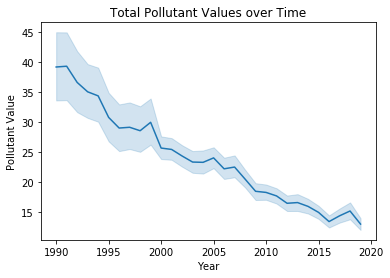

In [40]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

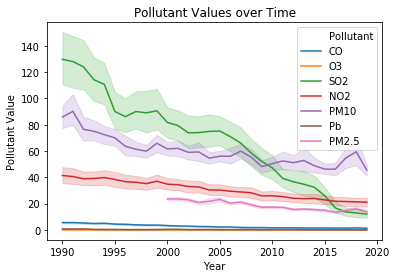

In [41]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column, hue = "Pollutant")
plt.title('Pollutant Values over Time')
plt.show()

In [42]:
demographics_data = pd.read_csv("https://data.cdc.gov/resource/vbim-akqf.csv")

In [46]:
demographics_data.groupby('race_ethnicity_combined').size()


race_ethnicity_combined
American Indian/Alaska Native, Non-Hispanic              20
Asian, Non-Hispanic                                       1
Black, Non-Hispanic                                     130
Missing                                                   1
Multiple/Other, Non-Hispanic                              2
Native Hawaiian/Other Pacific Islander, Non-Hispanic     14
Unknown                                                  16
White, Non-Hispanic                                     816
dtype: int64

In [48]:
demographics_data.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
count,1000,1000,546,1000,1000,1000,1000,1000,1000,1000,1000
unique,22,1,28,2,4,1,8,4,3,4,4
top,2020-11-14T00:00:00.000,2020-11-10T00:00:00.000,2020-11-10T00:00:00.000,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
freq,194,1000,148,975,825,1000,816,476,612,599,595
